In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Predicting Heart Disease

# Let's gooooo!!!
1. Problem definition
2. Data
3. Evaluation
4. Features
5. modelling
6. Experimentation

In [4]:
df = pd.read_csv("heart-disease.csv")

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [23]:
import cufflinks as cf

In [24]:
cf.go_offline()

In [27]:
plt.figure(figsize=(5,4))
df["target"].value_counts().iplot(kind = "bar")

<Figure size 360x288 with 0 Axes>

<AxesSubplot:xlabel='target', ylabel='target'>

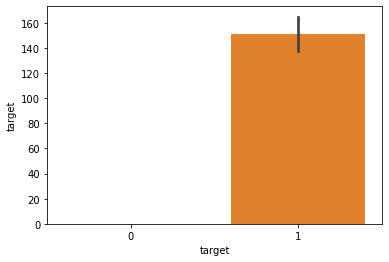

In [36]:
sns.barplot(y = df["target"].value_counts(), x = df["target"])

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [41]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [43]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


<AxesSubplot:xlabel='sex'>

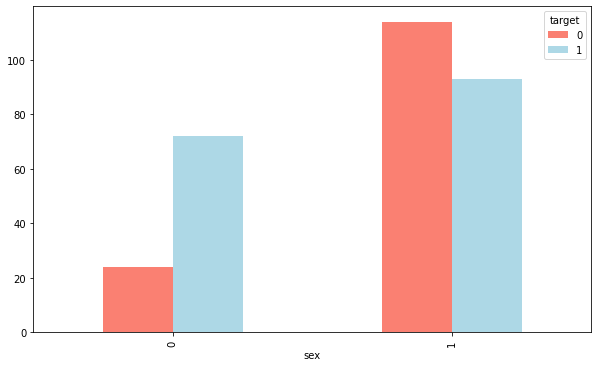

In [44]:
pd.crosstab(df["sex"], df["target"]).plot(kind = "bar", figsize = (10,6), color = ["salmon", "lightblue"])

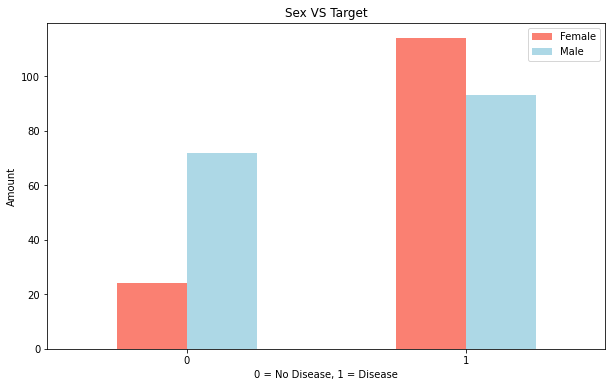

In [49]:
pd.crosstab(df["sex"], df["target"]).plot(kind = "bar", figsize = (10,6), color = ["salmon", "lightblue"])
plt.title("Sex VS Target")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation = 0); # keep the labels on the x-axis vertical

C:\Users\HUGO-TECH-89\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



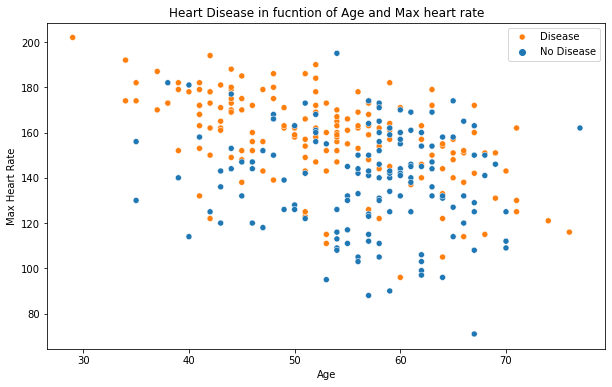

In [53]:
plt.figure(figsize=(10,6))
sns.scatterplot(df["age"], df["thalach"], hue = df["target"])
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.title("Heart Disease in fucntion of Age and Max heart rate")
plt.legend(["Disease", "No Disease"])

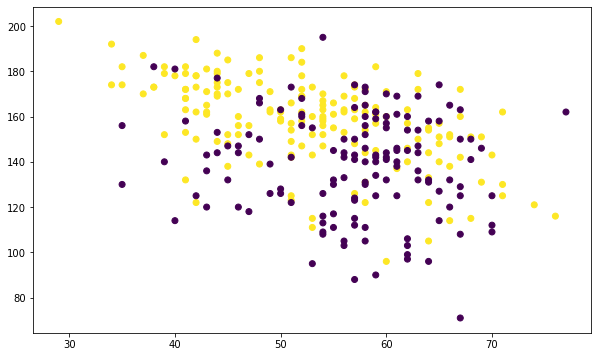

In [56]:
#Create scatter plot

plt.figure(figsize = (10,6))

plt.scatter(df["age"], df["thalach"], c = df["target"])

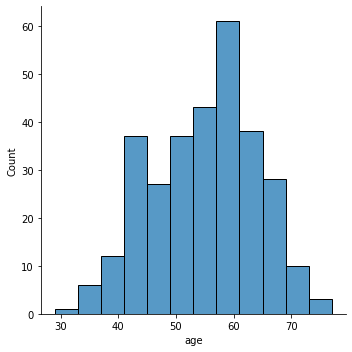

In [57]:
sns.displot(df["age"])

In [58]:
pd.crosstab(df["cp"], df["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


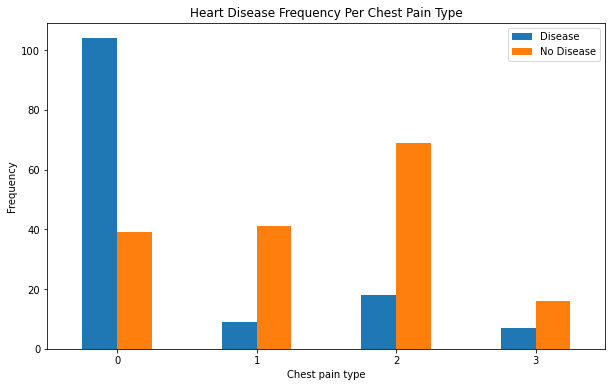

In [68]:

pd.crosstab(df["cp"], df["target"]).plot(kind = "bar", figsize=(10,6) )
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest pain type")
plt.ylabel("Frequency")
plt.legend(["Disease", "No Disease"])
plt.xticks(rotation = 0);

In [69]:
corr_matrix = df.corr()

In [70]:
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<AxesSubplot:>

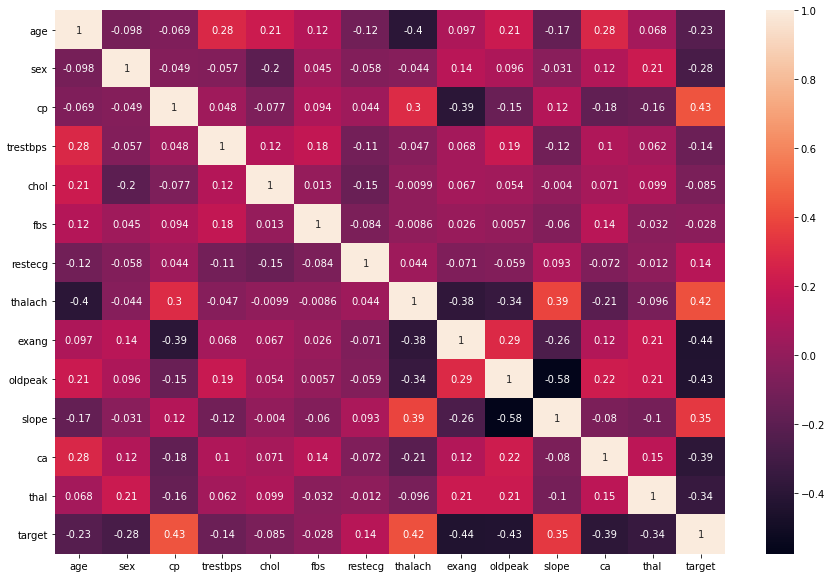

In [73]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot = True)

In [74]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [75]:
X = df.drop("target", axis = 1)
y = df["target"]

In [76]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [79]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
264,54,1,0,110,206,0,0,108,1,0.0,1,1,2
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2
38,65,0,2,155,269,0,1,148,0,0.8,2,0,2
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
49,53,0,0,138,234,0,0,160,0,0.0,2,0,2


In [81]:
len(y_train)

242

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [97]:
np.random.seed(42)
knn = KNeighborsClassifier().fit(X_train, y_train)
rand = RandomForestClassifier().fit(X_train, y_train)


knn_preds = knn.predict(X_test)

rand_preds = rand.predict(X_test)
print(classification_report(y_test, knn_preds))
#print("\n")

#print("\n")
print(classification_report(y_test, rand_preds))
    

              precision    recall  f1-score   support

           0       0.55      0.57      0.56        28
           1       0.62      0.61      0.62        33

    accuracy                           0.59        61
   macro avg       0.59      0.59      0.59        61
weighted avg       0.59      0.59      0.59        61

              precision    recall  f1-score   support

           0       0.74      0.89      0.81        28
           1       0.89      0.73      0.80        33

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.82      0.80      0.80        61



In [108]:
models = {"KNN" : KNeighborsClassifier(),
          #"Logistic Regression" : LogisticRegression(),
          "Random Forest" : RandomForestClassifier()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
        To fit and score our model
    """
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [109]:
model_scores = fit_and_score(models = models, X_train = X_train, y_train = y_train, X_test = X_test, y_test = y_test)

model_scores

{'KNN': 0.5901639344262295, 'Random Forest': 0.8032786885245902}

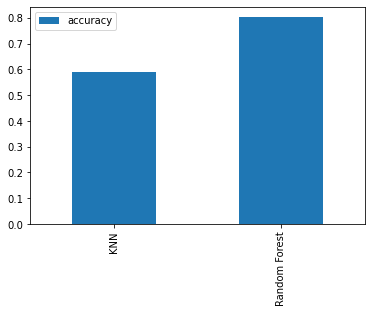

In [110]:
model_compare = pd.DataFrame(model_scores, index = ["accuracy"])
model_compare.T.plot.bar();

### Hyperparameter Tuning

In [135]:
#Let's tune KNN

train_scores = []
test_scores = []

#create a list of n_neigbours
neighbors = range(1, 21)

#set up KNN instance
knn = KNeighborsClassifier(n_neighbors=neighbors)

#Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    knn.fit(X_train, y_train)
    
    #update training score and testing score list
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [136]:
train_scores

[1.0,
 0.8140495867768595,
 0.7644628099173554,
 0.7727272727272727,
 0.8016528925619835,
 0.7892561983471075,
 0.768595041322314,
 0.7520661157024794,
 0.7355371900826446,
 0.7272727272727273,
 0.71900826446281,
 0.7231404958677686,
 0.7107438016528925,
 0.7107438016528925,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.7107438016528925,
 0.7066115702479339,
 0.7231404958677686]

In [137]:
trainer = pd.DataFrame(train_scores)

Maximum KNN score on the test data: 67.21%


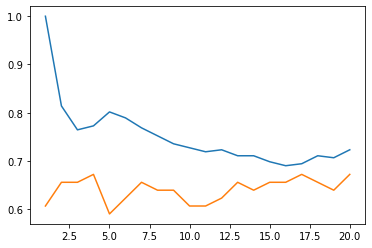

In [139]:
plt.plot(neighbors, train_scores, label = "Train Scores")
plt.plot(neighbors, test_scores, label = "Test Scores")

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

In [143]:
rf_grid = {"n_estimators" : np.arange(10, 1000, 60),
           "max_depth" : [None, 3, 5, 10],
           "min_samples_split" : np.arange(2, 20, 2),
           "min_samples_leaf" : np.arange(1, 20, 2)}

In [144]:
#Tune logistic regression
from sklearn.model_selection import RandomizedSearchCV

np.random.seed(42)

#setup Random hyperparameter search for randomforest classifier
rs_rf = RandomizedSearchCV(estimator = RandomForestClassifier(),
                           param_distributions = rf_grid,
                           cv = 5,
                           n_iter = 20,
                           verbose = True)
#So fit
rs_rf.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.9min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  70, 130, 190, 250, 310, 370, 430, 490, 550, 610, 670, 730,
       790, 850, 910, 970])},
                   verbose=True)

In [146]:
rs_rf.best_params_

{'n_estimators': 370,
 'min_samples_split': 18,
 'min_samples_leaf': 17,
 'max_depth': 5}

In [147]:
rs_rf.score(X_test, y_test)

0.7868852459016393

In [148]:
from sklearn.model_selection import GridSearchCV

In [149]:
y_predz = rs_rf.predict(X_test)

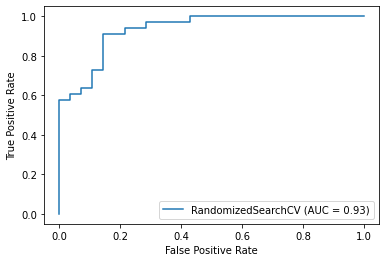

In [152]:
#import ROC curve
from sklearn.metrics import plot_roc_curve

#Plot roc curve and calculate AUC metric
plot_roc_curve(estimator = rs_rf, X = X_test,y = y_test)

In [153]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_predz))

[[24  4]
 [ 9 24]]


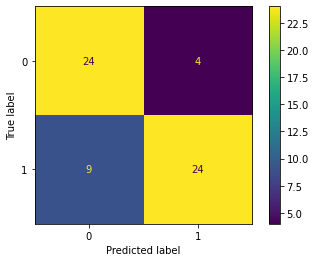

In [155]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(rs_rf, X_test, y_test)

<AxesSubplot:>

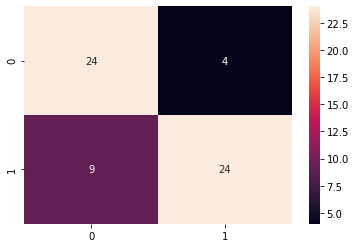

In [156]:
sns.heatmap(confusion_matrix(y_test, y_predz), annot=True)

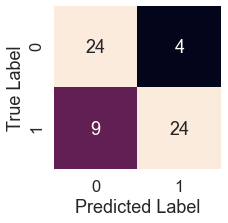

In [166]:
sns.set(font_scale = 1.5)
def plot_conf_mat(y_test, y_preds):
    """
    Plots a pretty heat map of a confusion matrix
    """
    fig, ax = plt.subplots(figsize = (3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot = True,
                    cbar = False)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
plot_conf_mat(y_test, y_predz)
    

In [167]:
from sklearn.metrics import classification_report

In [168]:
print(classification_report(y_test, y_predz))

              precision    recall  f1-score   support

           0       0.73      0.86      0.79        28
           1       0.86      0.73      0.79        33

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61



#Calculate evaluation metrics using cross val
precision recall and F1


In [169]:
from sklearn.model_selection import cross_val_score

In [170]:
rs_rf.best_params_

{'n_estimators': 370,
 'min_samples_split': 18,
 'min_samples_leaf': 17,
 'max_depth': 5}

In [176]:
clf = RandomForestClassifier(n_estimators = 370,
                             min_samples_split = 18,
                             min_samples_leaf = 17,
                             max_depth = 5)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [178]:
#cross validated accuracy
cv_acc = cross_val_score(clf, X, y, cv = 5, scoring = "accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.88333333, 0.76666667])

In [181]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8414754098360657

In [214]:
def metric_calculator(estimator, X, y, cv):
    """
        This is a function to calculate cross_val_accuracy, precision, recall and f1-score 
    """
    acc_1 = np.mean((cross_val_score(clf, X, y, cv = 5, scoring = "accuracy")))
    pre_2 = np.mean((cross_val_score(clf, X, y, cv = 5, scoring = "precision")))
    rec_3 = np.mean((cross_val_score(clf, X, y, cv = 5, scoring = "recall")))
    f1_4 = np.mean((cross_val_score(clf, X, y, cv = 5, scoring = "f1")))
    mets = acc_1, pre_2, rec_3, f1_4
    print(f"accuracy = {acc_1}, precision = {pre_2}, recall = {rec_3}, f1 = {f1_4} ") 
    all_metrics = pd.DataFrame(mets)
    all_metrics.plot(kind = "bar")
    return mets

accuracy = 0.8349180327868853, precision = 0.8244335244335245, recall = 0.8848484848484848, f1 = 0.8596163560172663 


(0.8349180327868853,
 0.8244335244335245,
 0.8848484848484848,
 0.8596163560172663)

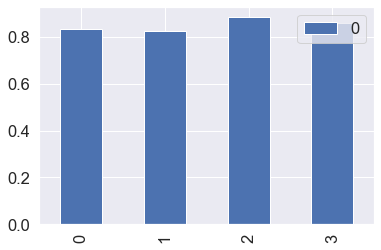

In [217]:
second_metric = metric_calculator(estimator = clf, X = X, y = y, cv = 5)
second_metric

In [222]:
goal = pd.DataFrame(second_metric, index=["Accuracy",
                           "Precision",
                           "recall",
                           "F1"])
goal

,0
Accuracy,0.834918
Precision,0.824434
recall,0.884848
F1,0.859616


<AxesSubplot:>

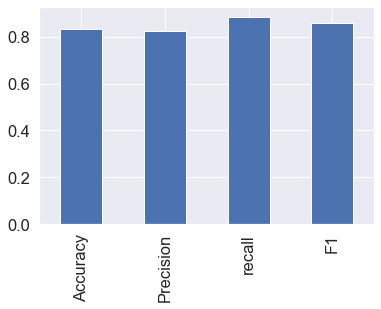

In [224]:
goal.plot(kind = "bar", legend = False)

In [187]:
#cross validated precision
cv_precision = cross_val_score(clf, X, y, cv = 5, scoring = "precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8329929547576607

In [198]:
#cross validated recall
cv_recall = cross_val_score(clf, X, y, cv = 5, scoring = "recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.8909090909090909

In [199]:
#cross validated f1-score
#cross validated recall
cv_f1 = cross_val_score(clf, X, y, cv = 5, scoring = "f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8413146225394765

<AxesSubplot:title={'center':'Cross-validated classification metrics'}>

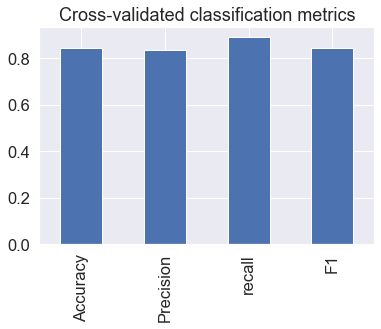

In [226]:
#Visualize the metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "recall": cv_recall,
                           "F1": cv_f1},
                          index = [0])

cv_metrics.T.plot.bar(title = "Cross-validated classification metrics", legend = False)

In [229]:
rs_rf.best_params_

{'n_estimators': 370,
 'min_samples_split': 18,
 'min_samples_leaf': 17,
 'max_depth': 5}

In [231]:
clf = RandomForestClassifier(n_estimators = 370,
 min_samples_split = 18,
 min_samples_leaf = 17,
 max_depth = 5)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=17, min_samples_split=18,
                       n_estimators=370)

In [233]:
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

<AxesSubplot:title={'center':'Feature importance'}>

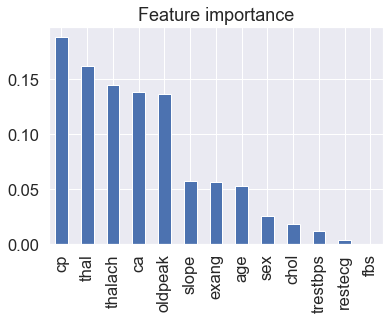

In [237]:
feature_importances.plot.bar(title = "Feature importance", legend = False)